<img src="images/housesbanner.png">

### <font color=blue>Importing required libraries</font>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics

from warnings import filterwarnings
filterwarnings("ignore")

### <font color=blue>Load the Data from CSV file</font>

In [2]:
data = pd.read_csv('input/kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [4]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### <font color=blue>Visualizing the correlation between the features</font>

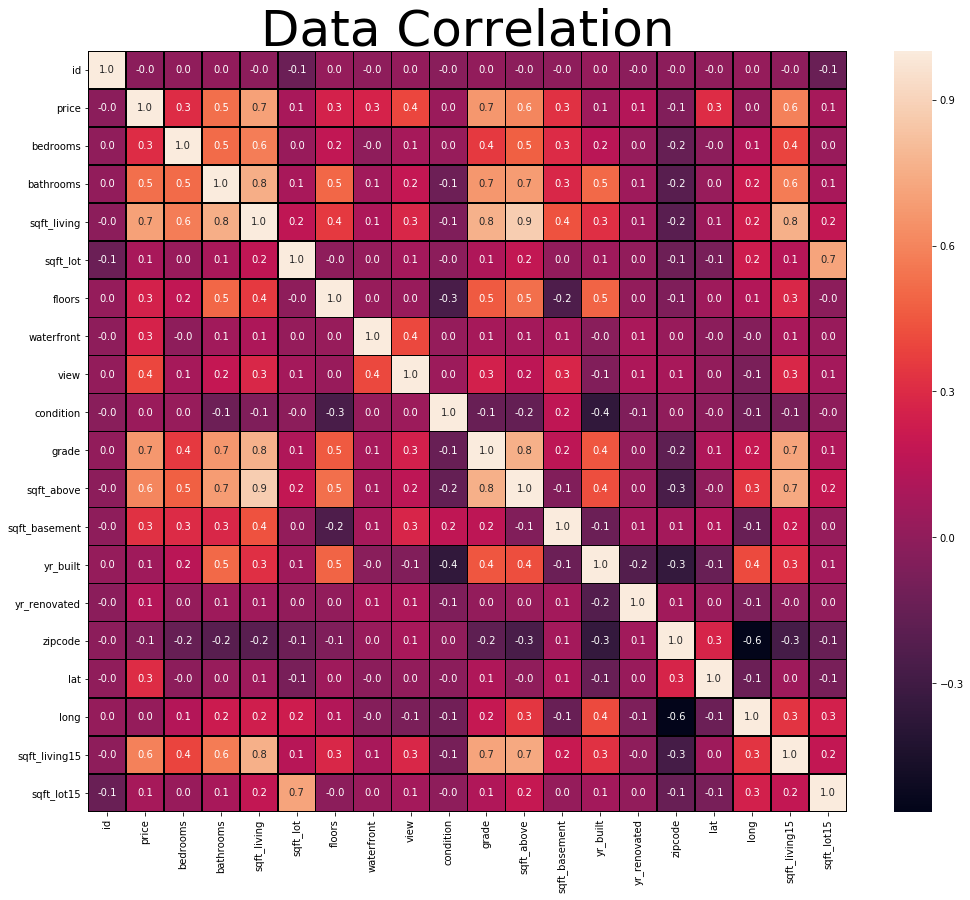

In [5]:
plt.subplots(figsize=(17,14))
sns.heatmap(data.corr(),annot=True,linewidths=0.5,linecolor="Black",fmt="1.1f")
plt.title("Data Correlation",fontsize=50)
plt.show()

### <font color=blue>Histogram of the Features</font>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025141EF1630>,
      dtype=object)

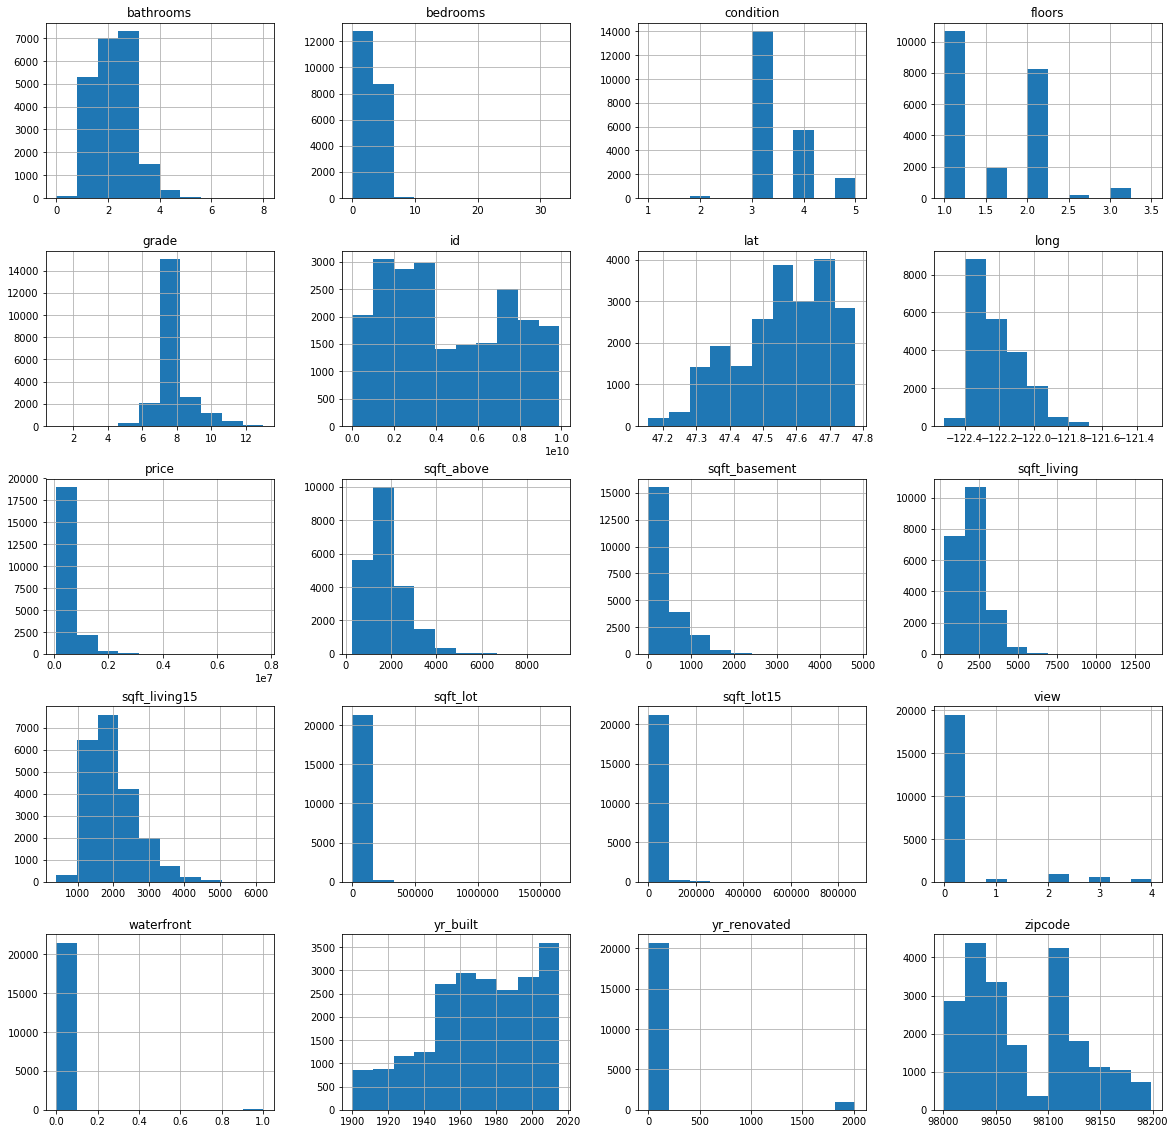

In [6]:
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
data.hist(ax = ax)

### <font color=blue>Distribution of the Features</font>

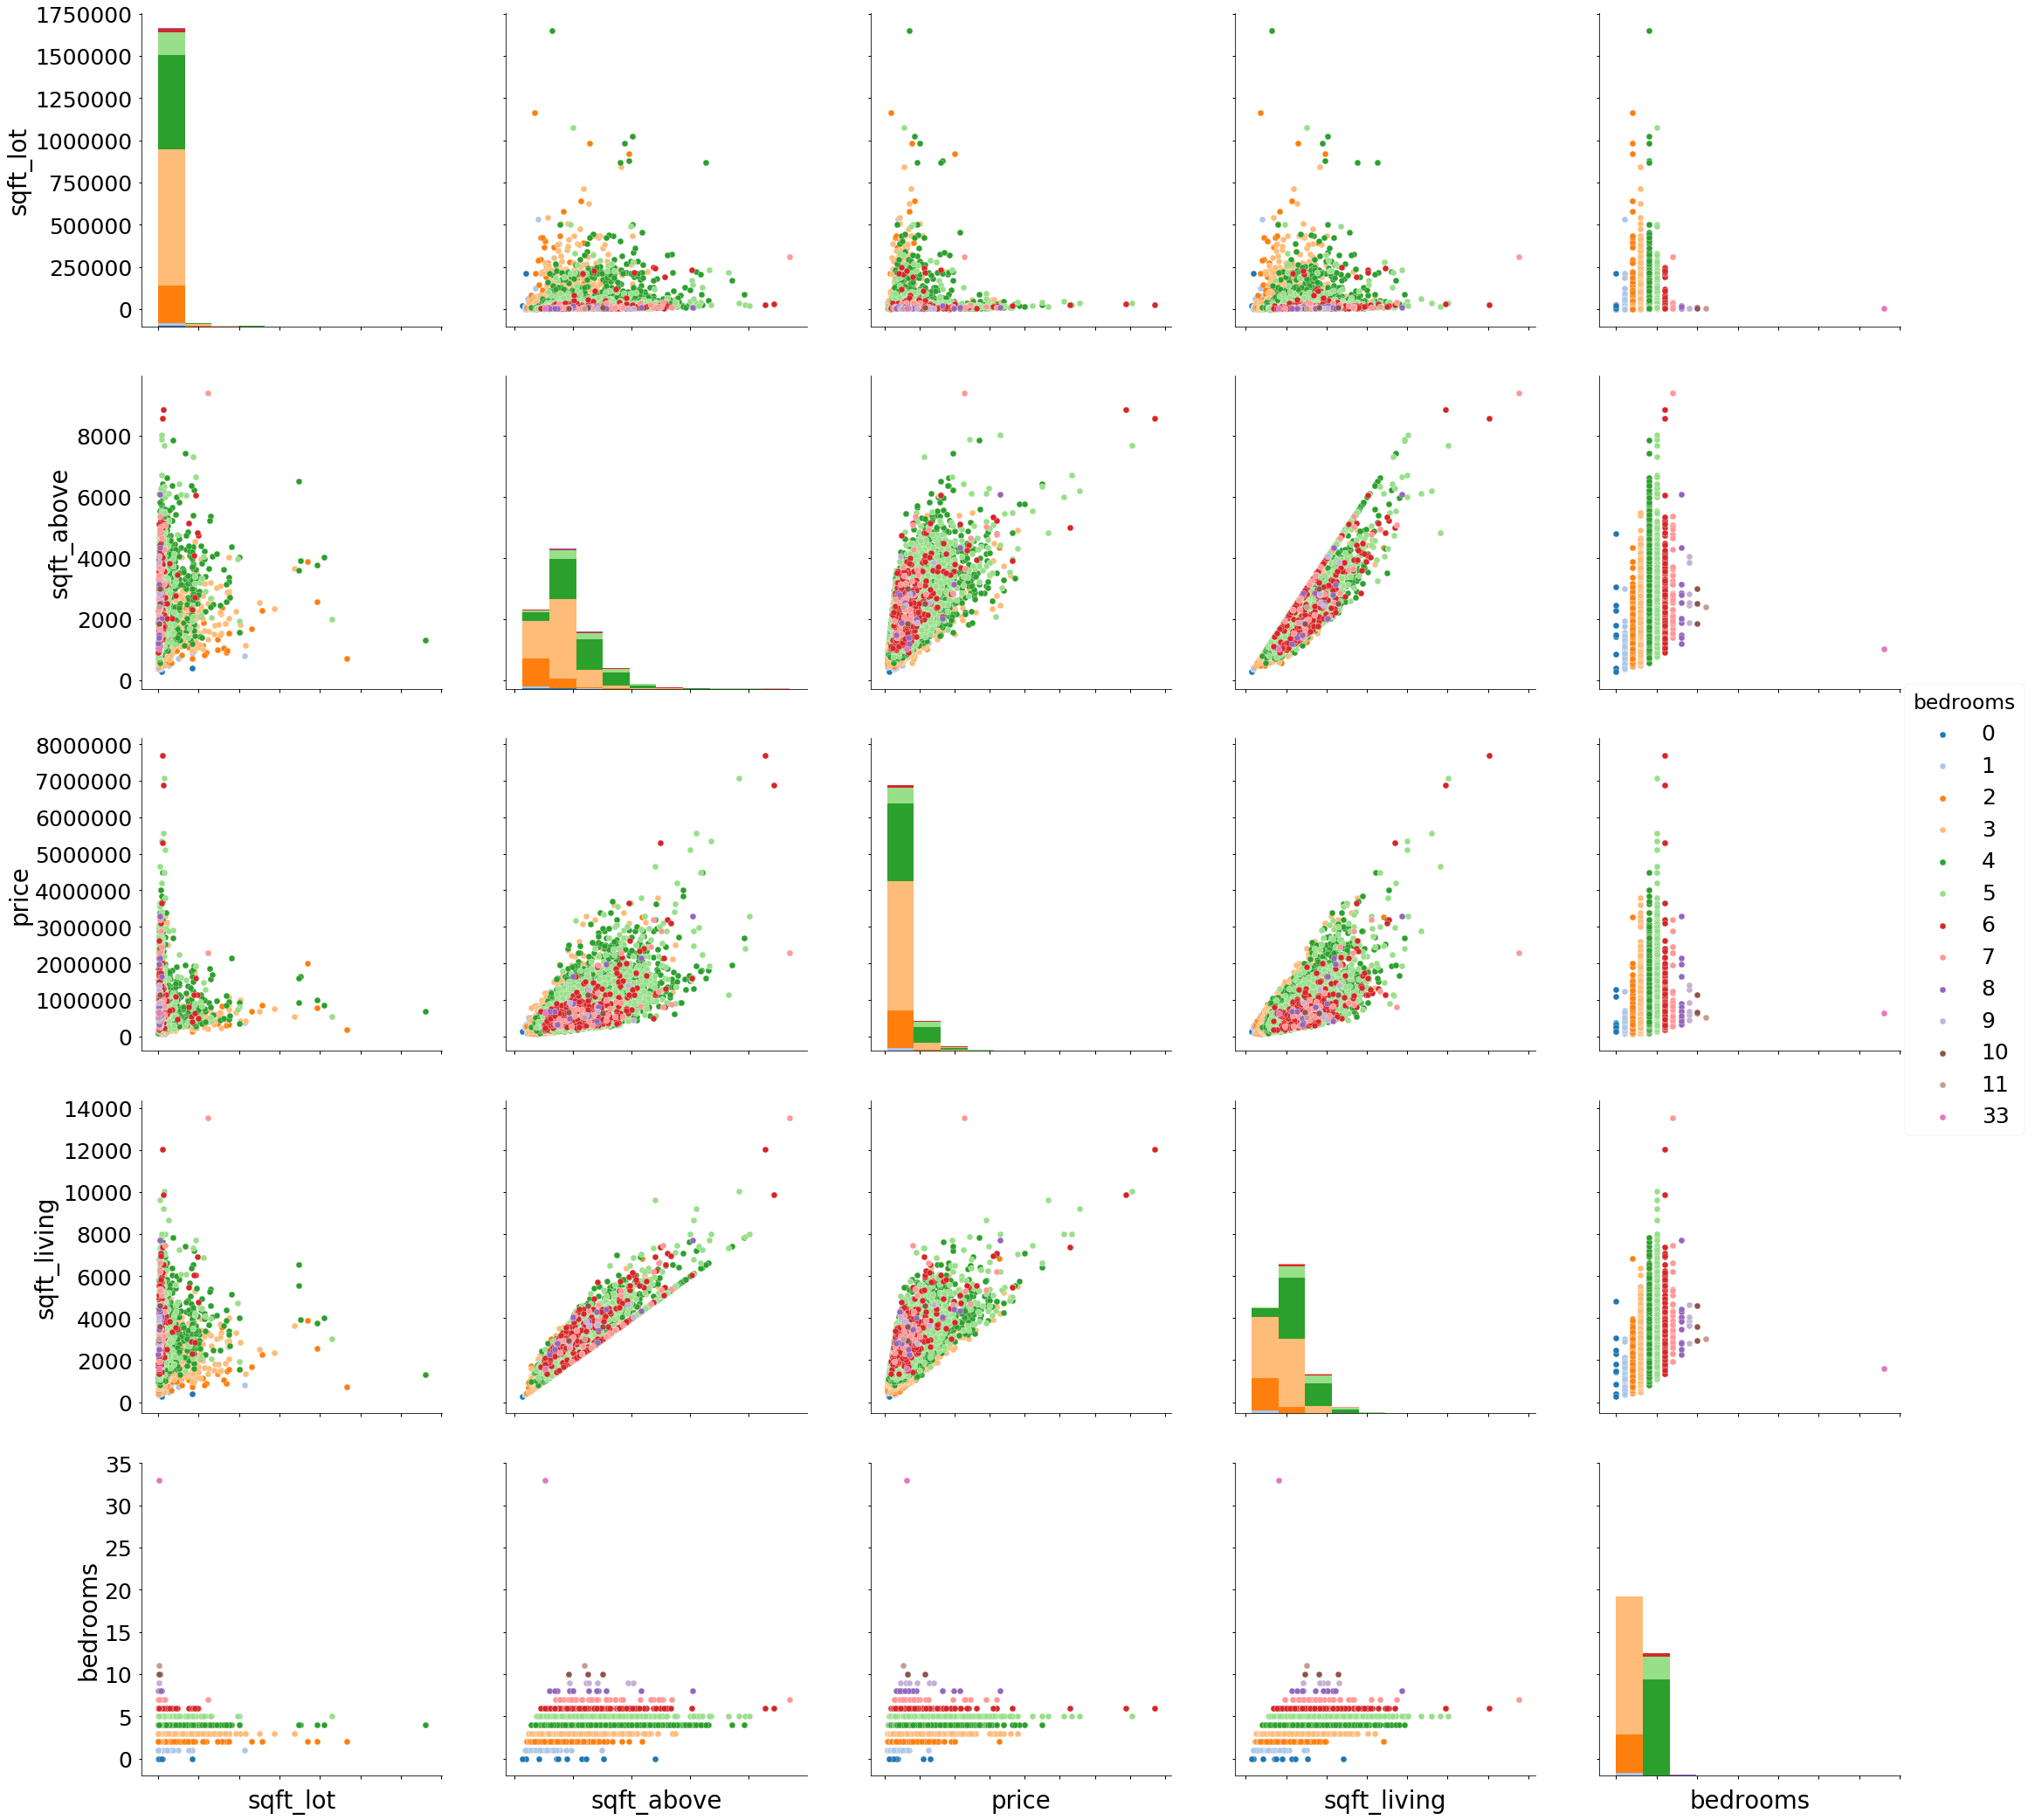

In [7]:
with sns.plotting_context("notebook",font_scale=2.5):
    g = sns.pairplot(data[['sqft_lot','sqft_above','price','sqft_living','bedrooms']], 
                 hue='bedrooms', palette='tab20',size=6)
g.set(xticklabels=[]);

### <font color=blue>Feature Selection</font>

In [8]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [9]:
data.columns.to_series().groupby(data.dtypes).groups

{dtype('int64'): Index(['id', 'bedrooms', 'sqft_living', 'sqft_lot', 'waterfront', 'view',
        'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
        'yr_renovated', 'zipcode', 'sqft_living15', 'sqft_lot15'],
       dtype='object'),
 dtype('float64'): Index(['price', 'bathrooms', 'floors', 'lat', 'long'], dtype='object'),
 dtype('O'): Index(['date'], dtype='object')}

In [14]:
data.columns.to_series().groupby(data.dtypes).groups

{dtype('int64'): Index(['id', 'bedrooms', 'sqft_living', 'sqft_lot', 'waterfront', 'view',
        'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
        'yr_renovated', 'zipcode', 'sqft_living15', 'sqft_lot15'],
       dtype='object'),
 dtype('float64'): Index(['price', 'bathrooms', 'floors', 'lat', 'long'], dtype='object'),
 dtype('O'): Index(['date'], dtype='object')}

In [25]:
print(data.shape)
data_int = data[['bedrooms', 'sqft_living', 'sqft_lot', 'waterfront', 'view',
        'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
        'yr_renovated', 'zipcode', 'sqft_living15', 'sqft_lot15', 'price']]
print(data_int.shape)

(21613, 21)
(21613, 10)


### <font color=blue>Split data as train and test</font>

In [19]:
# splitting data
train_data,test_data = train_test_split(data_int,train_size = 0.8,random_state=3)

y_train = np.array(train_data['price'], dtype=pd.Series)
X_train = np.array(train_data.drop(['price'], axis=1), dtype=pd.Series)


y_test = np.array(test_data['price'], dtype=pd.Series)
X_test = np.array(test_data.drop(['price'], axis=1), dtype=pd.Series)
print(data_int.shape)
print(X_train.shape)
print(X_test.shape)

(21613, 15)
(17290, 14)
(4323, 14)


### <font color=blue>Training</font>

In [20]:
# Linear Model 
lr = linear_model.LinearRegression()
# fitting the linear model
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### <font color=blue>Evaluation</font>

In [22]:
pred = lr.predict(X_test)
pred

array([ 458339.67574897, 1296058.69488728,  796367.36793701, ...,
       1113227.8108232 , 1212526.44873976,  277811.92590215])

In [23]:
print ("Average Price for Test Data: {:.3f}".format(test_data['price'].mean()))
print ("Mean Squared Error: {:.3f}".format(np.sqrt(metrics.mean_squared_error(y_test,pred))))
print('Intercept: {}'.format(lr.intercept_))
print('Coefficient: {}'.format(lr.coef_))
print('R-squared score (training): {:.3f}'.format(lr.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'.format(lr.score(X_test, y_test)))

Average Price for Test Data: 539744.130
Mean Squared Error: 211174.652
Intercept: 1239084.2294222708
Coefficient: [-3.34518445e+04  1.24900401e+02 -2.63331660e-02  5.57567685e+05
  4.49646240e+04  1.98782144e+04  1.24941764e+05  6.41913039e+01
  6.07090974e+01 -3.07850677e+03  2.37338995e+01  4.09661826e+01
  1.97116110e+01 -6.42246115e-01]
R-squared score (training): 0.648
R-squared score (test): 0.653


In [24]:
lr.score(X_test, y_test)

0.6525821339186185